In [1]:
import cv2
import matplotlib.pyplot as plt 
import math
import numpy as np

Bit depth: uint8


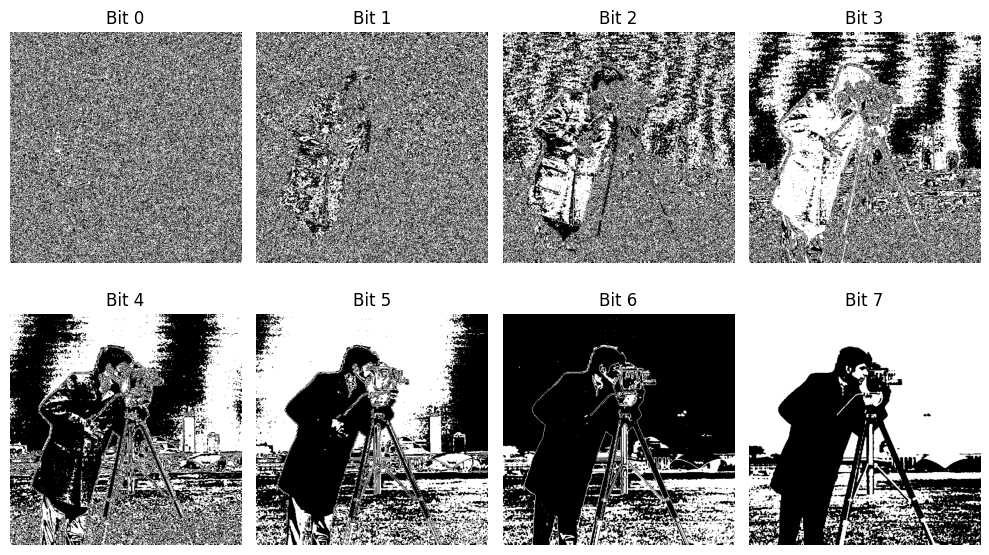

In [4]:
img = cv2.imread("./pics/cameraman.tif", cv2.IMREAD_GRAYSCALE)

print("Bit depth:", img.dtype)

bit_planes = []

for bit in range(8):
    plane = (img >> bit) & 1     # extract bit
    plane = plane * (2 ** bit)   # scale to proper intensity
    bit_planes.append(plane.astype(np.uint8))

# Display
plt.figure(figsize=(10,6))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(bit_planes[i], cmap='gray')
    plt.title(f'Bit {i}')
    plt.axis('off')

plt.tight_layout()
plt.show()


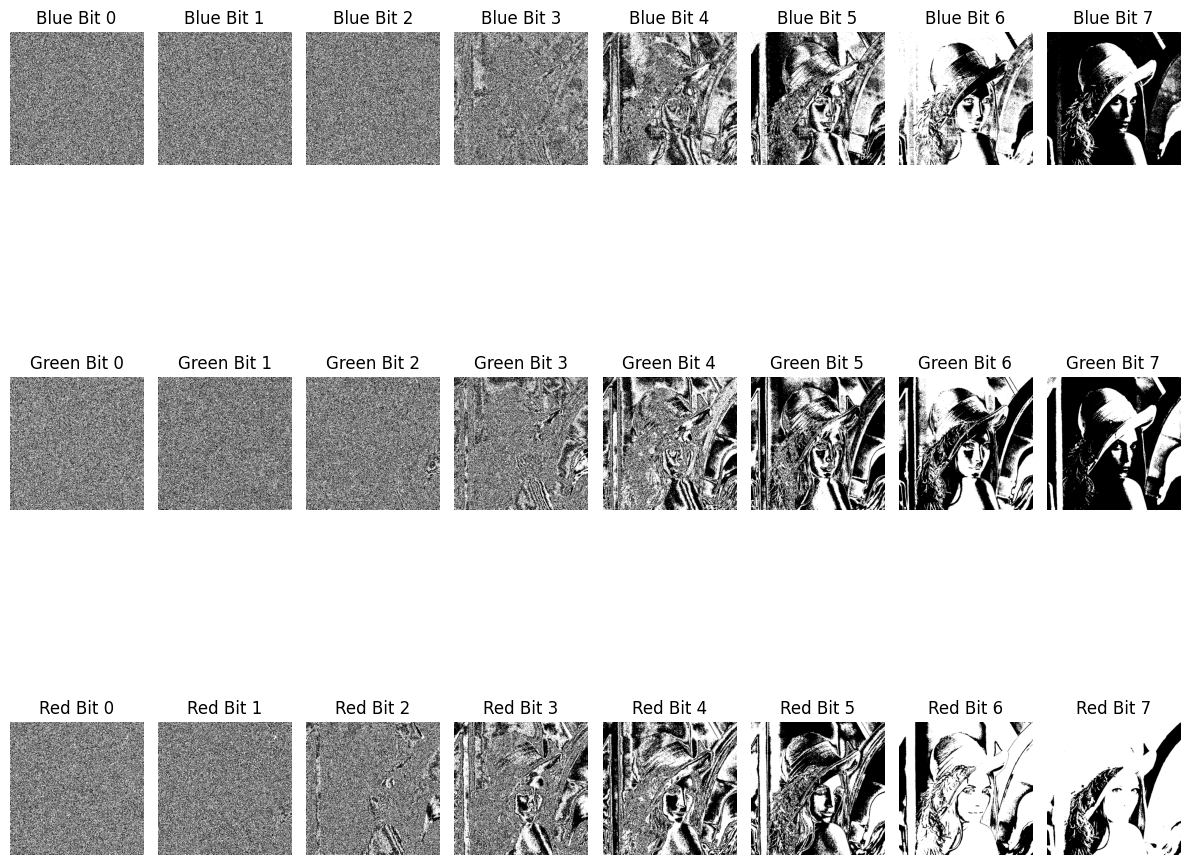

In [ ]:
img = cv2.imread("./pics/lena_color_512.tif")   # BGR format

# Split into channels
B, G, R = cv2.split(img)

channels = [B, G, R]
names = ["Blue", "Green", "Red"]

plt.figure(figsize=(12, 12))

plot_index = 1

# Process each channel
for ch, name in zip(channels, names):
    for bit in range(8):
        bit_plane = ((ch >> bit) & 1) * (2**bit)
        plt.subplot(3, 8, plot_index)
        plt.imshow(bit_plane, cmap='gray')
        plt.title(f"{name} Bit {bit}")
        plt.axis('off')
        plot_index += 1

plt.tight_layout()
plt.show()

In [ ]:
# -----------------------------
# File paths
# -----------------------------
cameraman_path = r"C:\Users\AsiaLapTop.Com\OneDrive\Documents\Python_Image_Processing_Tasks#2\pics\cameraman.tif"
lena_path = r"C:\Users\AsiaLapTop.Com\OneDrive\Documents\Python_Image_Processing_Tasks#2\pics\lena_color_512.tif"
xray_path = r"C:\Users\AsiaLapTop.Com\OneDrive\Documents\Python_Image_Processing_Tasks#2\pics\xray.tif"  # Optional if you have X-ray image

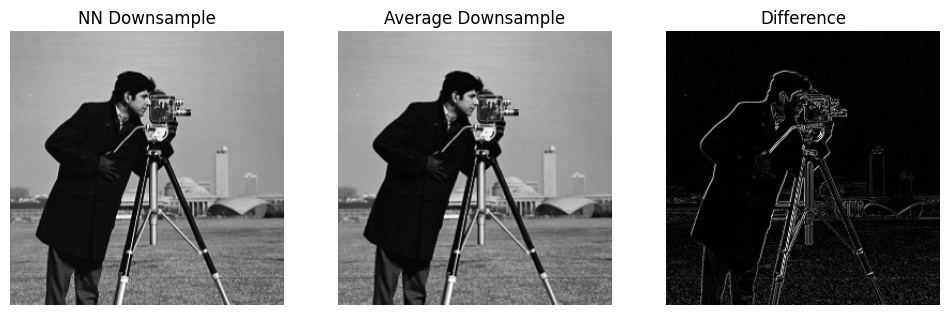

In [2]:
# -----------------------------
#  Compare Different Downsampling Methods
# -----------------------------
img = cv2.imread(cameraman_path, cv2.IMREAD_GRAYSCALE)

# Nearest Neighbor downsampling
def downsample_nn(img, factor):
    return img[::factor, ::factor]

# Average pooling downsampling
def downsample_avg(img, factor):
    h, w = img.shape
    img_small = img[:h//factor*factor, :w//factor*factor]  # Remove extra pixels
    return img_small.reshape(h//factor, factor, w//factor, factor).mean(axis=(1,3)).astype(np.uint8)

factor = 2
nn_img = downsample_nn(img, factor)
avg_img = downsample_avg(img, factor)

# Difference between the two methods
diff = cv2.absdiff(nn_img, avg_img)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(nn_img, cmap='gray'); plt.title("NN Downsample"); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(avg_img, cmap='gray'); plt.title("Average Downsample"); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(diff, cmap='gray'); plt.title("Difference"); plt.axis('off')
plt.show()

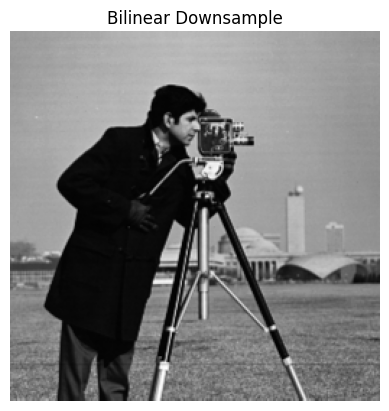

In [3]:
# -----------------------------
#  Another Downsampling Method: Bilinear Interpolation
# -----------------------------
bilinear_img = cv2.resize(img, (img.shape[1]//factor, img.shape[0]//factor), interpolation=cv2.INTER_LINEAR)
plt.imshow(bilinear_img, cmap='gray')
plt.title("Bilinear Downsample")
plt.axis('off')
plt.show()

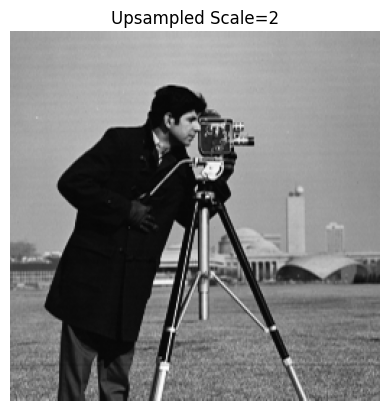

In [5]:
# -----------------------------
#  Effect of Scale in Upsampling
# -----------------------------
scale = 2
upsampled_img = cv2.resize(nn_img, (nn_img.shape[1]*scale, nn_img.shape[0]*scale), interpolation=cv2.INTER_NEAREST)
plt.imshow(upsampled_img, cmap='gray')
plt.title(f"Upsampled Scale={scale}")
plt.axis('off')
plt.show()


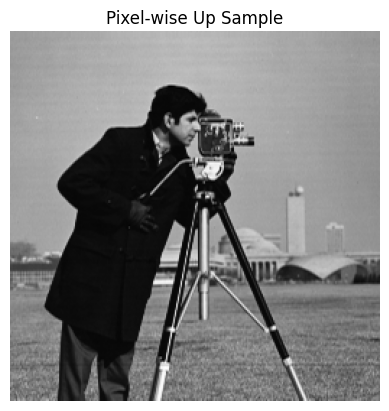

In [6]:
# -----------------------------
#  Pixel-wise Upsampling
# -----------------------------
def pixel_up_sample(img, factor):
    h, w = img.shape
    up_img = np.zeros((h*factor, w*factor), dtype=img.dtype)
    for i in range(h):
        for j in range(w):
            up_img[i*factor:(i+1)*factor, j*factor:(j+1)*factor] = img[i,j]
    return up_img

up_img_pixel = pixel_up_sample(nn_img, 2)
plt.imshow(up_img_pixel, cmap='gray')
plt.title("Pixel-wise Up Sample")
plt.axis('off')
plt.show()

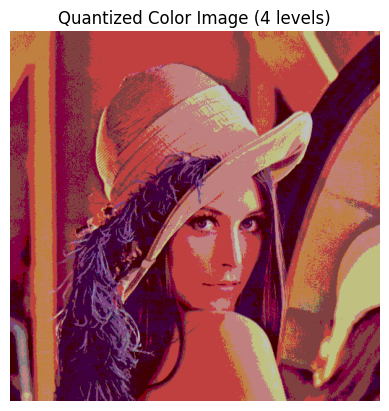

In [7]:
# -----------------------------
#  Color Image Quantization
# -----------------------------
img_color = cv2.imread(lena_path)
levels = 4  # Number of quantization levels

def quantize_channel(channel, levels):
    return (channel // (256//levels)) * (256//levels)

B, G, R = cv2.split(img_color)
Bq, Gq, Rq = [quantize_channel(ch, levels) for ch in [B, G, R]]
img_q = cv2.merge([Bq, Gq, Rq])

plt.imshow(cv2.cvtColor(img_q, cv2.COLOR_BGR2RGB))
plt.title(f"Quantized Color Image ({levels} levels)")
plt.axis('off')
plt.show()

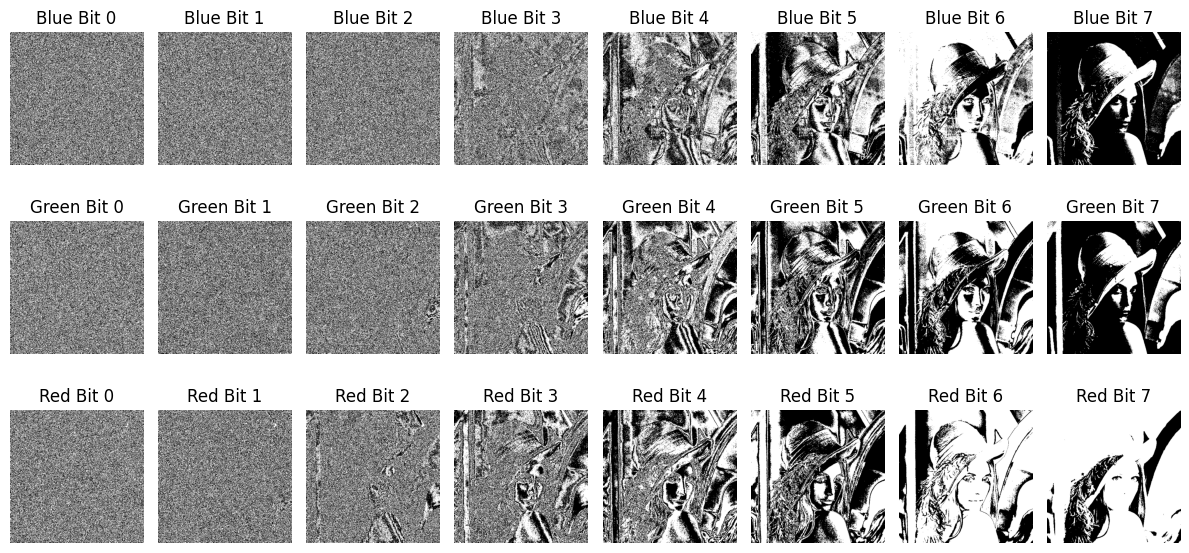

In [8]:
# -----------------------------
#  Compare Bitplanes of Different Color Channels
# -----------------------------
channels = [B, G, R]
names = ["Blue", "Green", "Red"]

plt.figure(figsize=(12, 6))
for idx, (ch, name) in enumerate(zip(channels, names)):
    for bit in range(8):
        bit_plane = ((ch >> bit) & 1) * (2**bit)
        plt.subplot(3, 8, idx*8 + bit + 1)
        plt.imshow(bit_plane, cmap='gray')
        plt.title(f"{name} Bit {bit}")
        plt.axis('off')
plt.tight_layout()
plt.show()

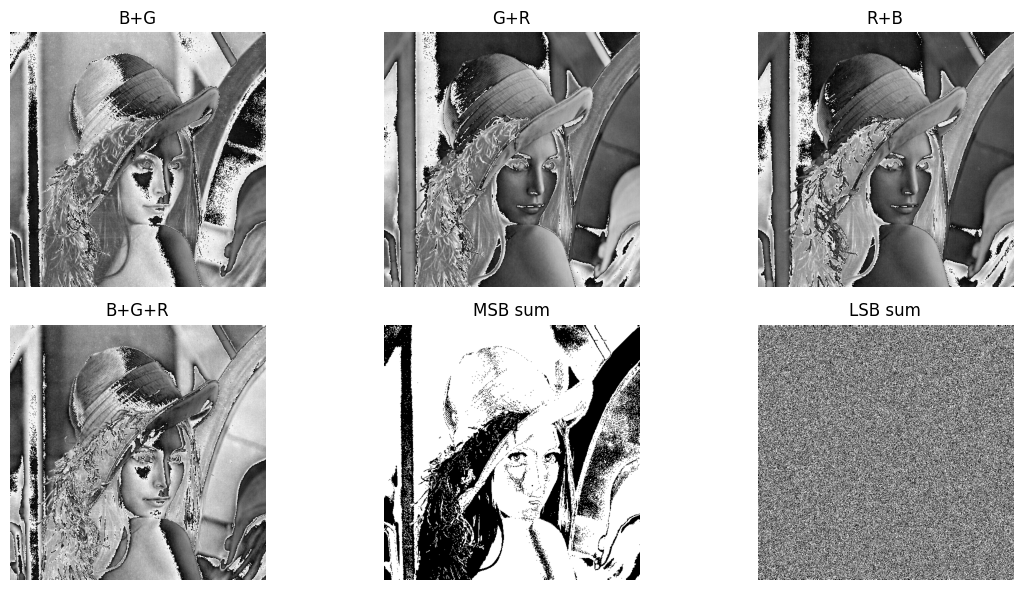

In [9]:
# -----------------------------
#  Sum of Bitplanes from Different Channels
# -----------------------------
sum1 = B + G
sum2 = G + R
sum3 = R + B
sum4 = B + G + R
sum5 = ((B>>7)&1)*128 + ((G>>7)&1)*128 + ((R>>7)&1)*128  # Sum of MSB
sum6 = ((B>>0)&1)*1 + ((G>>0)&1)*1 + ((R>>0)&1)*1        # Sum of LSB

sums = [sum1, sum2, sum3, sum4, sum5, sum6]
titles = ["B+G", "G+R", "R+B", "B+G+R", "MSB sum", "LSB sum"]

plt.figure(figsize=(12,6))
for i, (s, t) in enumerate(zip(sums, titles)):
    plt.subplot(2,3,i+1)
    plt.imshow(s, cmap='gray')
    plt.title(t)
    plt.axis('off')
plt.tight_layout()
plt.show()